In [33]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [34]:
# Import the dataset from csv file and read through pandas.
iris = pd.read_csv('iris.csv', delimiter = ',')

In [3]:
# Examine the shape of the dataset: 150 rows, 5 columns.
iris.shape

(150, 5)

In [4]:
# Number of instances and how many attributes in the dataset. 
# Demonstrates a complete dataset - no null values.
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
sepal_length    150 non-null float64
sepal_width     150 non-null float64
petal_length    150 non-null float64
petal_width     150 non-null float64
species         150 non-null object
dtypes: float64(4), object(1)
memory usage: 5.9+ KB


In [5]:
# Number of instances of each species shows a balanced dataset - each type is equally represented.
iris.groupby('species').size()

species
setosa        50
versicolor    50
virginica     50
dtype: int64

In [6]:
# Sample look at the dataset.
iris.sample(10)

,sepal_length,sepal_width,petal_length,petal_width,species
76,6.8,2.8,4.8,1.4,versicolor
34,4.9,3.1,1.5,0.1,setosa
135,7.7,3.0,6.1,2.3,virginica
84,5.4,3.0,4.5,1.5,versicolor
2,4.7,3.2,1.3,0.2,setosa
147,6.5,3.0,5.2,2.0,virginica
37,4.9,3.1,1.5,0.1,setosa
40,5.0,3.5,1.3,0.3,setosa
122,7.7,2.8,6.7,2.0,virginica
85,6.0,3.4,4.5,1.6,versicolor


In [17]:
# Basic statistical features of the dataset as a whole.
iris.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


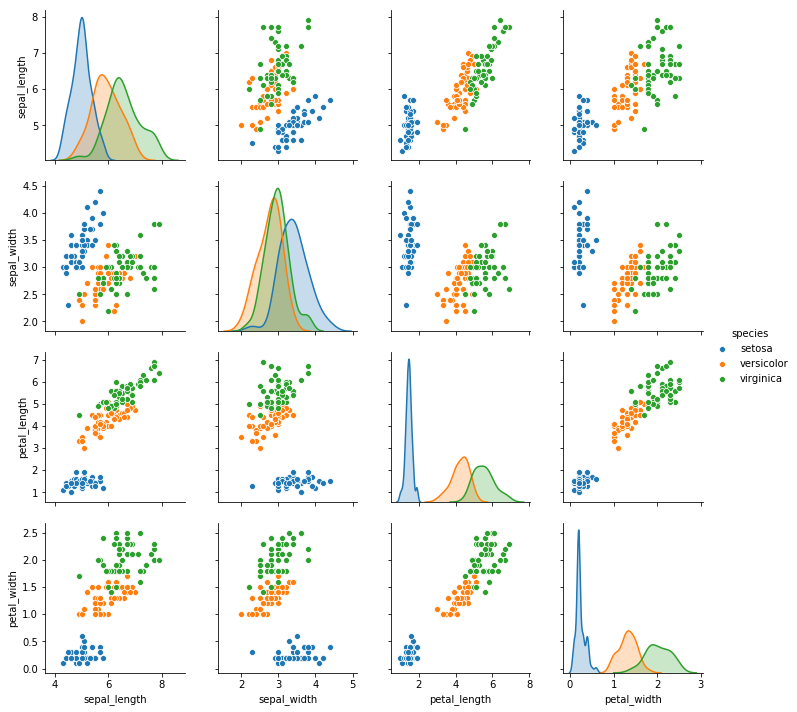

In [10]:
# Initial visual observation of the measurements and relationships between them.
sns.pairplot(iris, # dataset 
             hue = 'species') # variable to plot with different colours
plt.show()

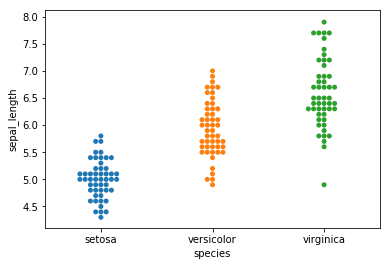

In [48]:
# Swarmplots here and below show the distribution of measurements by species.
sns.swarmplot(x = 'species', y = 'sepal_length', data = iris)
plt.show()

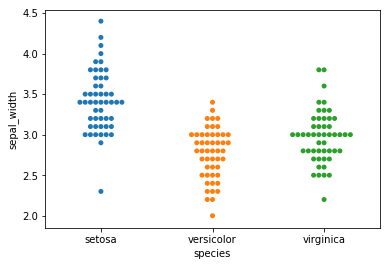

In [49]:
sns.swarmplot(x = 'species', y = 'sepal_width', data = iris)
plt.show()

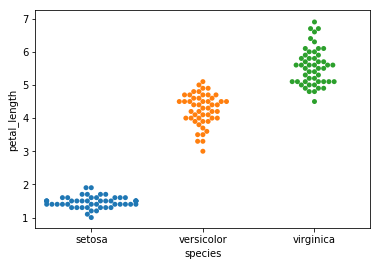

In [50]:
sns.swarmplot(x = 'species', y = 'petal_length', data = iris)
plt.show()

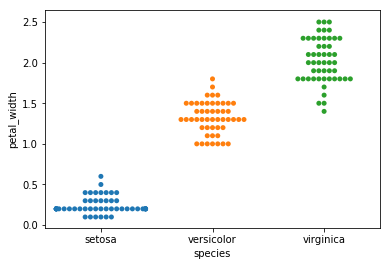

In [51]:
sns.swarmplot(x = 'species', y = 'petal_width', data = iris)
plt.show()

In [10]:
# Correlations between measurements.
iris.corr()

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.109369,0.871754,0.817954
sepal_width,-0.109369,1.000000,-0.420516,-0.356544
petal_length,0.871754,-0.420516,1.000000,0.962757
petal_width,0.817954,-0.356544,0.962757,1.000000


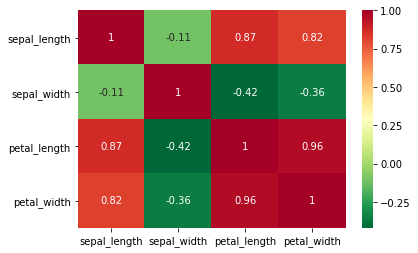

In [11]:
# Visualising correlations (heatmap)
# https://www.kaggle.com/kamrankausar/iris-dataset-ml-and-deep-learning-from-scratch
sns.heatmap(iris.corr(),annot=True,cmap='RdYlGn_r') 
plt.show()

### Splitting the Dataset 
Below the dataset is split to explore each species individually.

In [39]:
# Creating three smaller datasets, one for each species, so they can be individually assessed.
setosa = iris.loc[0:49]
versicolor = iris.loc[50:99]
virginica = iris.loc[100:149]

# Dropping the fifth column 'species' as not required.
setosa = setosa.drop(columns = 'species')
versicolor = versicolor.drop(columns = 'species')
virginica = virginica.drop(columns = 'species')

In [21]:
# Mean values of each individual iris species and dataset as a whole.
# Demonstrates differences in measurements between species. 
# Further illustrated by the all_species mean figures which are very disimilar to those of any particular species. 
sp_mean = iris.groupby('species').mean()
to_mean = iris.mean()
means = sp_mean.append(to_mean, ignore_index=True)
means.insert(0, 'species', ['setosa', 'versicolor', 'virginica', 'all_species'])
means

,species,sepal_length,sepal_width,petal_length,petal_width
0,setosa,5.006000,3.418,1.464000,0.244000
1,versicolor,5.936000,2.770,4.260000,1.326000
2,virginica,6.588000,2.974,5.552000,2.026000
3,all_species,5.843333,3.054,3.758667,1.198667


In [22]:
# Standard Deviation values of each individual iris species and dataset as a whole.
# Again demonstrates how the measurements of each particular species are more closely aligned than the measurements as a whole.
sp_std = iris.groupby('species').std()
to_std = iris.std()
std = sp_std.append(to_std, ignore_index=True)
std.insert(0, 'species', ['setosa', 'versicolor', 'virginica', 'all_species'])
std

,species,sepal_length,sepal_width,petal_length,petal_width
0,setosa,0.352490,0.381024,0.173511,0.107210
1,versicolor,0.516171,0.313798,0.469911,0.197753
2,virginica,0.635880,0.322497,0.551895,0.274650
3,all_species,0.828066,0.433594,1.764420,0.763161


In [ ]:
setosa.hist()
plt.show

### Setosa

In [41]:
setosa.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,50.00000,50.000000,50.000000,50.00000
mean,5.00600,3.418000,1.464000,0.24400
std,0.35249,0.381024,0.173511,0.10721
min,4.30000,2.300000,1.000000,0.10000
25%,4.80000,3.125000,1.400000,0.20000
50%,5.00000,3.400000,1.500000,0.20000
75%,5.20000,3.675000,1.575000,0.30000
max,5.80000,4.400000,1.900000,0.60000


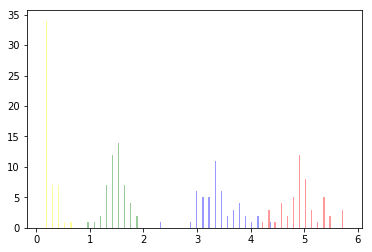

In [54]:
sns.distplot(setosa, kde=False, color=['red', 'blue', 'green', 'yellow'], bins=50)
plt.show()

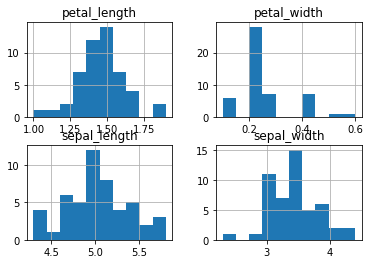

In [56]:
setosa.hist()
plt.show()

In [14]:
setosa.corr()

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,0.746780,0.263874,0.279092
sepal_width,0.746780,1.000000,0.176695,0.279973
petal_length,0.263874,0.176695,1.000000,0.306308
petal_width,0.279092,0.279973,0.306308,1.000000


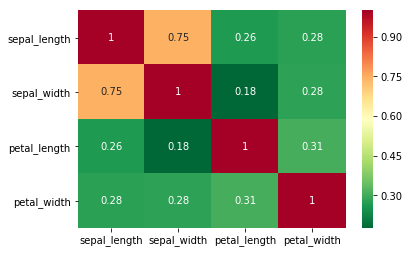

In [15]:
sns.heatmap(setosa.corr(),annot=True,cmap='RdYlGn_r') 
plt.show()

### Versicolor

In [11]:
versicolor = iris.loc[50:99]
versicolor.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,50.000000,50.000000,50.000000,50.000000
mean,5.936000,2.770000,4.260000,1.326000
std,0.516171,0.313798,0.469911,0.197753
min,4.900000,2.000000,3.000000,1.000000
25%,5.600000,2.525000,4.000000,1.200000
50%,5.900000,2.800000,4.350000,1.300000
75%,6.300000,3.000000,4.600000,1.500000
max,7.000000,3.400000,5.100000,1.800000


In [12]:
versicolor.corr()

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,0.525911,0.754049,0.546461
sepal_width,0.525911,1.000000,0.560522,0.663999
petal_length,0.754049,0.560522,1.000000,0.786668
petal_width,0.546461,0.663999,0.786668,1.000000


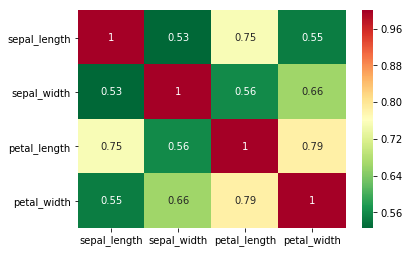

In [18]:
sns.heatmap(versicolor.corr(),annot=True,cmap='RdYlGn_r') 
plt.show()

### Virginica

In [13]:
virginica = iris.loc[100:149]
virginica.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,50.00000,50.000000,50.000000,50.00000
mean,6.58800,2.974000,5.552000,2.02600
std,0.63588,0.322497,0.551895,0.27465
min,4.90000,2.200000,4.500000,1.40000
25%,6.22500,2.800000,5.100000,1.80000
50%,6.50000,3.000000,5.550000,2.00000
75%,6.90000,3.175000,5.875000,2.30000
max,7.90000,3.800000,6.900000,2.50000


In [14]:
virginica.corr()

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,0.457228,0.864225,0.281108
sepal_width,0.457228,1.000000,0.401045,0.537728
petal_length,0.864225,0.401045,1.000000,0.322108
petal_width,0.281108,0.537728,0.322108,1.000000


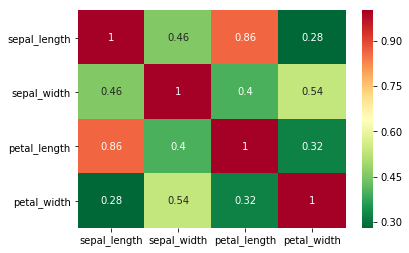

In [16]:
sns.heatmap(virginica.corr(),annot=True,cmap='RdYlGn_r') 
plt.show()

In [8]:
setosa.min()

sepal_length       4.3
sepal_width        2.3
petal_length         1
petal_width        0.1
species         setosa
dtype: object